# IBM CAPSTONE PROJECT - ANALYZING THE OUTBREAK OF COVID-19 IN THE UNITED STATES AND USING MACHINE LEARNING ALGORITHMS TO PREDICT CONFIRMED CASES IN THE COMING DAYS

## Background
### The coronavirus COVID-19 pandemic is the defining global health crisis of our time and the greatest challenge we have faced since the second World War. Since its emergence in Asia late last year, the virus has spread to every continent except Antarctica. COVID-19, short for "coronavirus disease 2019," is the official name given by the World Health Organization. As many as 213 countries and territories have registered COVID-19 cases, and the entire world is buzzing with uncertainty and questions. At the time of writing this report, there are over 4,713,026 confirmed cases of COVID-19 across the globe. The COVID-19 pandemic has been greatly affecting people’s lives and the world’s economy. Among many infection related questions, governments and people are most concerned with (i) when the COVID-19 outbreak will peak; (ii) how long the outbreak will last and (iii) how many people will eventually be infected. 
### Through this project, we will try to understand and analyze the trend of COVID 19 in different states in the US, predict its damage so that effective measures can be taken against it. The forecasts obtained from this project can help inform public health decision-making by projecting the likely impact in coming days. This understanding can help the government gauge the current level f preparedness and devote appropriate resources and medical services in regions requiring critical attention.


## Data source and description

### To perform the required analysis, data has been extracted from two sources, namely, Kaggle and Foursquare.
### COVID-19 dataset has been taken from Kaggle. The details of the dataset are as follows :
### •	Sno - Serial number 
### •	ObservationDate - Date of the observation in MM/DD/YYYY 
### •	Province/State - Province or state of the observation (Could be empty when missing) Country/Region - Country of observation 
### •	Last Update - Time in UTC at which the row is updated for the given province or country. Confirmed - Cumulative number of confirmed cases till that date 
### •	Deaths - Cumulative number of  deaths till that date 
### •	Recovered - Cumulative number of recovered cases till that date
### Datasource : https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

### Foursquare Location Dataset 
### It provides data about different places all around the world. Features and Examples: Analysis of different geographic locations including exploring places, finding trending locations near a venue, exploring users and their reviews about places can be done through Foursquare location dataset.  



## EXPLORATORY DATA ANALYSIS

### Data Preprocessing

In [51]:
import pandas as pd
import numpy as np
import os
os.chdir("C:\\Users\\Saumya\\Desktop\\Certifications\\IBM Data Science\\Final Project")
os.getcwd()

'C:\\Users\\Saumya\\Desktop\\Certifications\\IBM Data Science\\Final Project'

## Reading data into a pandas dataframe and gettng review of the data

In [52]:
Data = pd.read_csv("covid_19_data.csv")
Data.head(100)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0000,0.0000,0.0000
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0000,0.0000,0.0000
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0000,0.0000,0.0000
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0000,0.0000,0.0000
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...
95,96,01/24/2020,Anhui,Mainland China,1/24/20 17:00,15.0000,0.0000,0.0000
96,97,01/24/2020,Fujian,Mainland China,1/24/20 17:00,10.0000,0.0000,0.0000
97,98,01/24/2020,Henan,Mainland China,1/24/20 17:00,9.0000,0.0000,0.0000
98,99,01/24/2020,Jiangsu,Mainland China,1/24/20 17:00,9.0000,0.0000,0.0000


In [53]:
print("Dataset contains",Data.shape[0],"rows","and",Data.shape[1],"columns.")
print("The dataset contains data for",len(Data['Country/Region'].unique()),"countries.")
print("The dataset contains data for",len(Data['Province/State'].unique()),"states.")

Dataset contains 25959 rows and 8 columns.
The dataset contains data for 223 countries.
The dataset contains data for 355 states.


## This dataframe contains Covid 19 cases for all countries, for the purpose of this project, I will be developing a new dataframe that will be focussing only on the United States

In [54]:
USData = Data[Data['Country/Region']=='US']
USData

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,32,01/22/2020,Washington,US,1/22/2020 17:00,1.0000,0.0000,0.0000
69,70,01/23/2020,Washington,US,1/23/20 17:00,1.0000,0.0000,0.0000
117,118,01/24/2020,Washington,US,1/24/20 17:00,1.0000,0.0000,0.0000
118,119,01/24/2020,Chicago,US,1/24/20 17:00,1.0000,0.0000,0.0000
158,159,01/25/2020,Washington,US,1/25/20 17:00,1.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...
25949,25950,05/17/2020,Virginia,US,2020-05-18 02:32:21,30388.0000,1010.0000,0.0000
25950,25951,05/17/2020,Washington,US,2020-05-18 02:32:21,18433.0000,1001.0000,0.0000
25951,25952,05/17/2020,West Virginia,US,2020-05-18 02:32:21,1492.0000,67.0000,0.0000
25953,25954,05/17/2020,Wisconsin,US,2020-05-18 02:32:21,12543.0000,453.0000,0.0000


## Finding the dimensions,null values and datatypes of the attributes in the dataset

In [55]:
print("Dimensions of the dataset are",USData.shape)
print("The null values in each attribube in the dataset are as follows :\n",USData.isnull().sum())
print("The datatyoe for each attribute in the datastet are as follows: \n",USData.dtypes)

Dimensions of the dataset are (4874, 8)
The null values in each attribube in the dataset are as follows :
 SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64
The datatyoe for each attribute in the datastet are as follows: 
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


## Dropping the Serial number column and converting Observation Date into suitable datetime format

In [56]:
import datetime
USData['ObservationDate'] = USData['ObservationDate'].apply(pd.to_datetime)
USData = USData.drop(columns=['SNo'],axis=1)
USData.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,2020-01-22,Washington,US,1/22/2020 17:00,1.0000,0.0000,0.0000
69,2020-01-23,Washington,US,1/23/20 17:00,1.0000,0.0000,0.0000
117,2020-01-24,Washington,US,1/24/20 17:00,1.0000,0.0000,0.0000
118,2020-01-24,Chicago,US,1/24/20 17:00,1.0000,0.0000,0.0000
158,2020-01-25,Washington,US,1/25/20 17:00,1.0000,0.0000,0.0000


## Extracting basic information from the data

In [57]:
datewise=USData.groupby(["ObservationDate"])[['Confirmed','Deaths','Recovered']].sum().reset_index()
datewise["Days Since"]=datewise.index-datewise.index.min()
datewise.tail(5)

,ObservationDate,Confirmed,Deaths,Recovered,Days Since
112,2020-05-13,1390406.0000,84119.0000,243430.0000,112
113,2020-05-14,1417774.0000,85898.0000,246414.0000,113
114,2020-05-15,1442824.0000,87530.0000,250747.0000,114
115,2020-05-16,1467820.0000,88754.0000,268376.0000,115
116,2020-05-17,1486757.0000,89562.0000,272265.0000,116


In [58]:
print("\033[1m" + "US COVID DATA ANALYSIS"+"\033[1m")
print("Totol number of provinces with Covid impact: ",len(USData["Province/State"].unique()))
print("Total number of Confirmed Cases: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases: ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day : ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day : ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed Cases per hour : ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour : ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

US COVID DATA ANALYSIS
Totol number of provinces with Covid impact:  199
Total number of Confirmed Cases:  1486757.0
Total number of Recovered Cases:  272265.0
Total number of Deaths Cases:  89562.0
Total number of Active Cases:  1124930.0
Total number of Closed Cases:  361827.0
Approximate number of Confirmed Cases per Day:  12707.0
Approximate number of Recovered Cases per Day :  2327.0
Approximate number of Death Cases per Day :  765.0
Approximate number of Confirmed Cases per hour :  529.0
Approximate number of Recovered Cases per hour:  97.0
Approximate number of Death Cases per hour :  32.0
Number of Confirmed Cases in last 24 hours:  18937.0
Number of Recovered Cases in last 24 hours:  3889.0
Number of Death Cases in last 24 hours:  808.0


## Plotting the number of cases 

In [59]:
#importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Daily increase in the number of Confirmed Cases, Recovered Cases and Deaths

In [60]:
datewise['month']=datewise['ObservationDate'].dt.month_name()

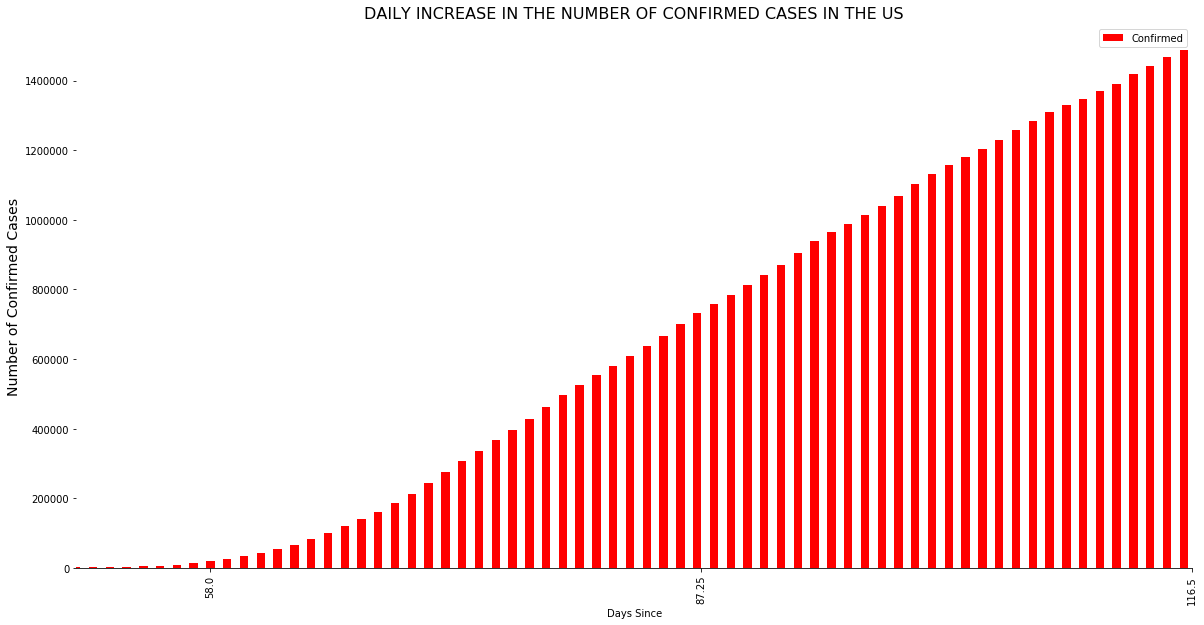

In [61]:
ax = datewise.plot('Days Since','Confirmed',color='red',kind='bar',figsize=(20,10))
plt.xlabel('Days Since',fontsize = 10)
plt.ylabel('Number of Confirmed Cases',fontsize = 14)
plt.title('DAILY INCREASE IN THE NUMBER OF CONFIRMED CASES IN THE US',fontsize =16)
sns.despine(top = True,left = True,right = True)
N=5
xmin, xmax = ax.get_xlim()
custom_ticks = np.linspace(xmin, xmax, N)
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_ticks)
plt.xlim(xmin=50)
plt.show()

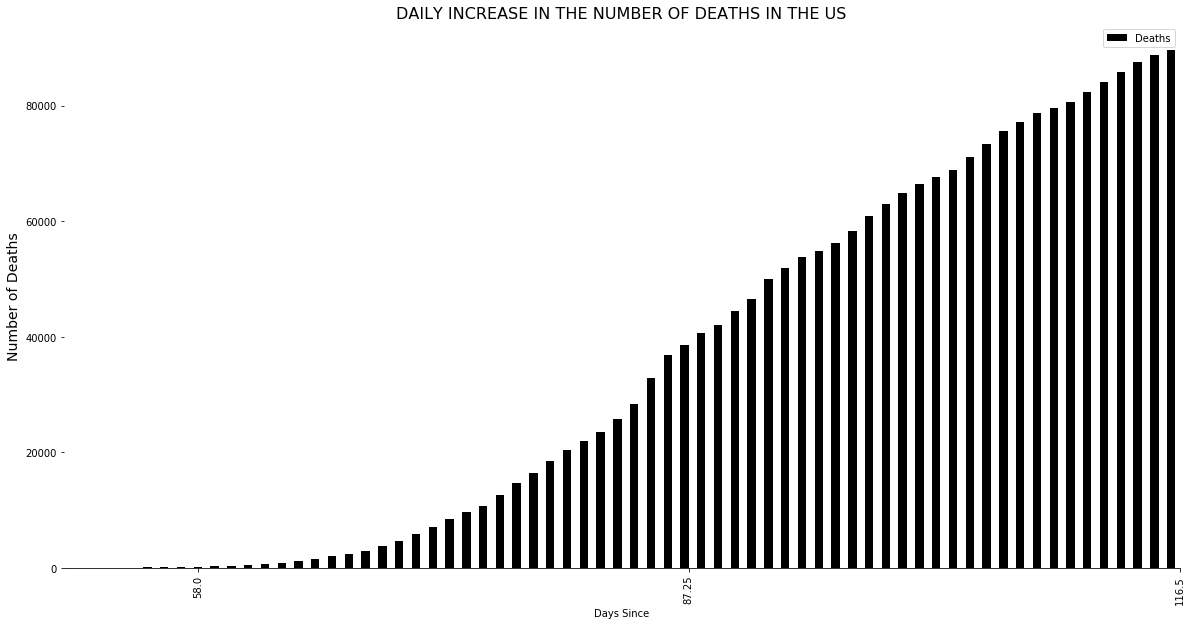

In [62]:
ax = datewise.plot('Days Since','Deaths',color='black',kind='bar',figsize=(20,10))
plt.xlabel('Days Since',fontsize = 10)
plt.ylabel('Number of Deaths',fontsize = 14)
plt.title('DAILY INCREASE IN THE NUMBER OF DEATHS IN THE US',fontsize =16)
sns.despine(top = True,left = True,right = True)
N=5
xmin, xmax = ax.get_xlim()
custom_ticks = np.linspace(xmin, xmax, N)
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_ticks)
plt.xlim(xmin=50)
plt.show()

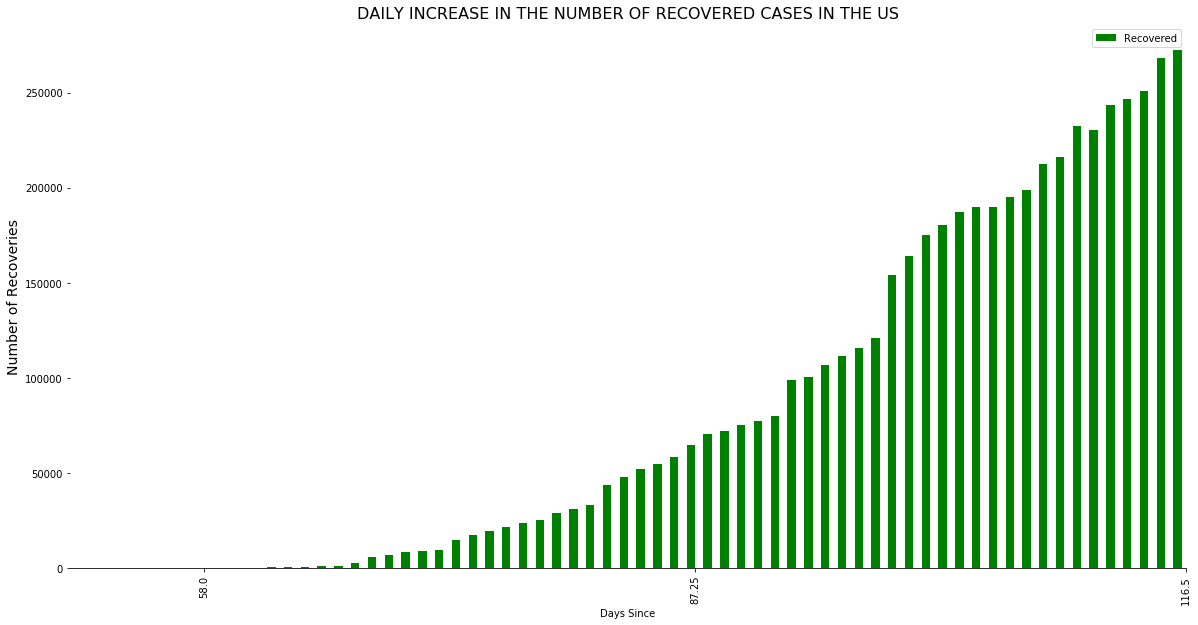

In [63]:
ax = datewise.plot('Days Since','Recovered',color='green',kind='bar',figsize=(20,10))
plt.xlabel('Days Since',fontsize = 10)
plt.ylabel('Number of Recoveries',fontsize = 14)
plt.title('DAILY INCREASE IN THE NUMBER OF RECOVERED CASES IN THE US',fontsize =16)
sns.despine(top = True,left = True,right = True)
N=5
xmin, xmax = ax.get_xlim()
custom_ticks = np.linspace(xmin, xmax, N)
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_ticks)
plt.xlim(xmin=50)
plt.show()

In [64]:
## Plotting the distribution week wise
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
datewise["WeekOfYear"]=1

### Weekly increase in the number of Confirmed Cases, Recovered Cases and Deaths per province

In [65]:
datewise["WeekOfYear"]=datewise['ObservationDate'].dt.weekofyear
datewise['WeekOfYear'] = datewise['WeekOfYear']-3 ## to get the weeks starting from 21st January

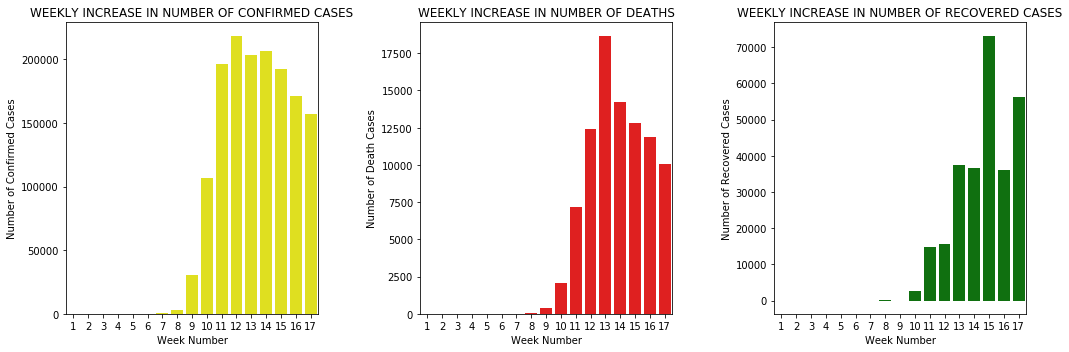

In [66]:
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1,color='yellow')
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2,color='red')
sns.barplot(x=week_num,y=pd.Series(weekwise_recovered).diff().fillna(0),ax=ax3,color='green')
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax3.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax3.set_ylabel("Number of Recovered Cases")
ax1.set_title("WEEKLY INCREASE IN NUMBER OF CONFIRMED CASES")
ax2.set_title("WEEKLY INCREASE IN NUMBER OF DEATHS")
ax3.set_title("WEEKLY INCREASE IN NUMBER OF RECOVERED CASES")
plt.tight_layout()

## Performing Province wise analysis on the dataset

### Since every date has cumulative number of cases, data needs to be filtered out province wise

In [67]:
ProvinceData=USData[USData["ObservationDate"]==USData["ObservationDate"].max()].groupby(["Province/State"]).agg({"Confirmed":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
ProvinceData.head()

,Confirmed,Deaths
Province/State,,
New York,350121.0000,28232.0000
New Jersey,146504.0000,10363.0000
Illinois,94191.0000,4177.0000
Massachusetts,86010.0000,5797.0000
California,80166.0000,3240.0000


## Finding top 20 provinces with highest number of Confirmed cases and highest number of deaths

Text(0.5, 1.0, 'Top 20 states as per Number of Deaths')

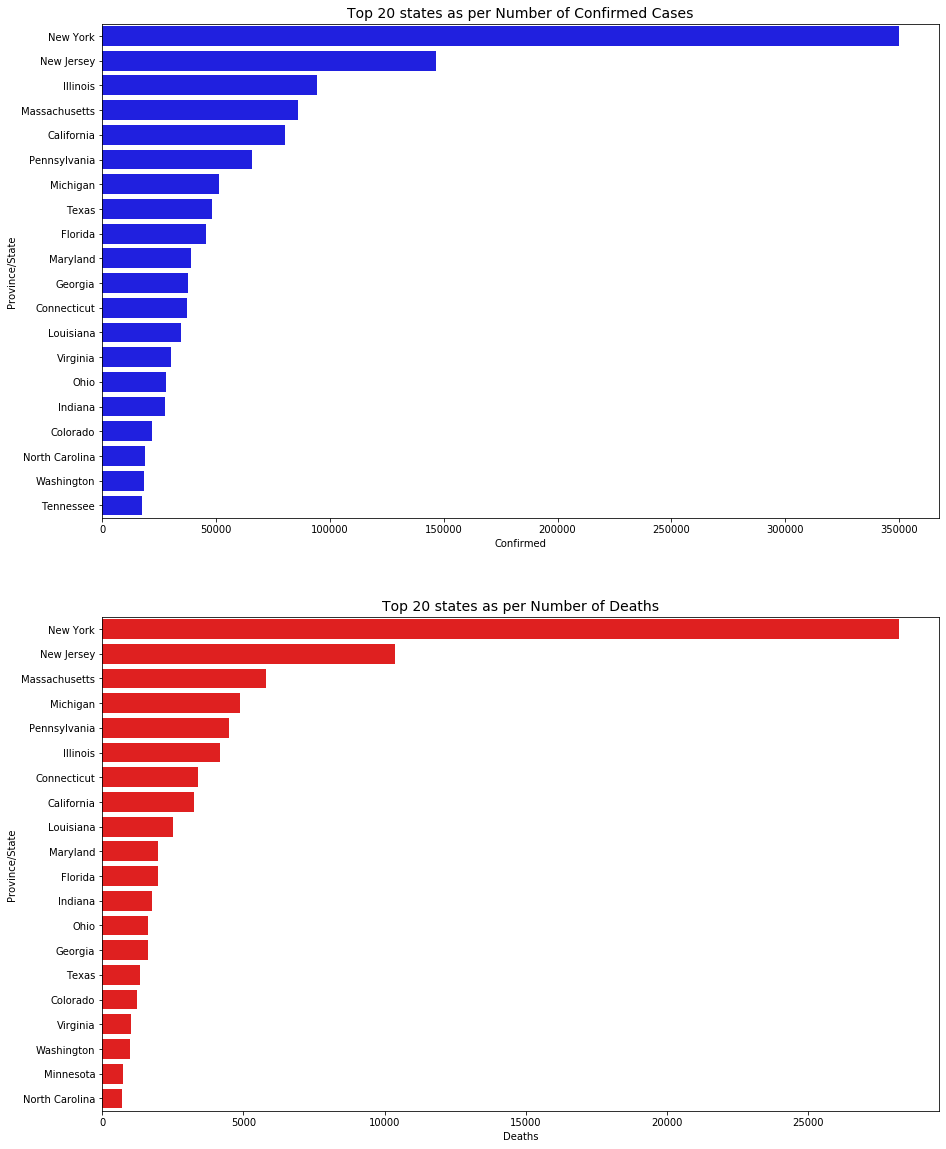

In [68]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(15,20))
top_20_confirmed=ProvinceData.sort_values(["Confirmed"],ascending=False).head(20)
top_20_deaths=ProvinceData.sort_values(["Deaths"],ascending=False).head(20)
sns.barplot(x=top_20_confirmed["Confirmed"],y=top_20_confirmed.index,ax=ax1,color='blue')
ax1.set_title("Top 20 states as per Number of Confirmed Cases",fontsize=14)
sns.barplot(x=top_20_deaths["Deaths"],y=top_20_deaths.index,ax=ax2,color='red')
ax2.set_title("Top 20 states as per Number of Deaths",fontsize=14)

## Finding the mortality rate for every province

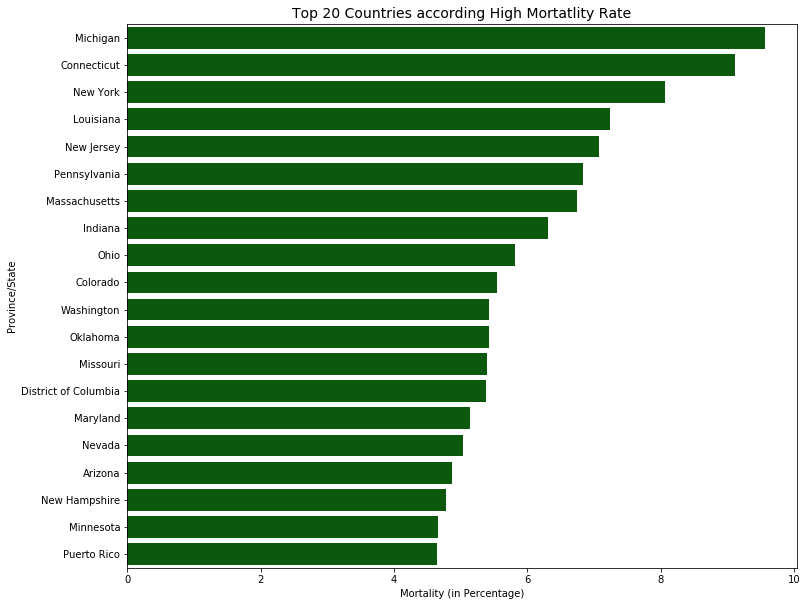

In [69]:
ProvinceData["Mortality"]=(ProvinceData["Deaths"]/ProvinceData["Confirmed"])*100
ProvinceData_mortality_rate=ProvinceData[ProvinceData["Confirmed"]>1000].sort_values(["Mortality"],ascending=False).head(20)
plt.figure(figsize=(12,10))
ax = sns.barplot(x=ProvinceData_mortality_rate["Mortality"],y=ProvinceData_mortality_rate.index,color='darkgreen')
ax.set_title("Top 20 Countries according High Mortatlity Rate",fontsize=14)
ax.set_xlabel("Mortality (in Percentage)")
plt.show()

## Creating state codes for plotting cases in USA

In [70]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [71]:
MapData=USData[USData["ObservationDate"]==USData["ObservationDate"].max()].groupby(["Province/State"]).agg({"Confirmed":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False).reset_index()
x=0
MapData['code']=1
for i in MapData['Province/State']:
    if i in us_state_abbrev:
        MapData.iloc[x,3]=us_state_abbrev[i]
        
    x=x+1
df=MapData[MapData['code']!=1]
df

,Province/State,Confirmed,Deaths,code
0,New York,350121.0000,28232.0000,NY
1,New Jersey,146504.0000,10363.0000,NJ
2,Illinois,94191.0000,4177.0000,IL
3,Massachusetts,86010.0000,5797.0000,MA
4,California,80166.0000,3240.0000,CA
5,Pennsylvania,65700.0000,4495.0000,PA
6,Michigan,51142.0000,4891.0000,MI
7,Texas,48396.0000,1343.0000,TX
8,Florida,45588.0000,1973.0000,FL
9,Maryland,38804.0000,1992.0000,MD


## Plotting a map for Number of Confirmed Cases in the US

In [72]:
import plotly.graph_objects as go

# Load data frame and tidy it.
import pandas as pd

fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['Confirmed'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'orrd',#Zmin and zmap for limiting the values to be plotted
    colorbar_title = "Confirmed Cases in thousands"
))

fig.update_layout(
    title_text = 'NUMBER OF CONFIRMED CASES IN DIFFERENT STATES IN USA',
    geo_scope='usa', # limite map scope to USA
)
#fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)

fig.show()

## Plotting a map for Number of Deaths in the US

In [73]:
import plotly.graph_objects as go

# Load data frame and tidy it.
import pandas as pd

fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['Deaths'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'blues',#Zmin and zmap for limiting the values to be plotted
    colorbar_title = "Confirmed Cases in thousands"
))

fig.update_layout(
    title_text = 'NUMBER OF DEATHS IN DIFFERENT STATES IN USA',
    geo_scope='usa', # limite map scope to USA
)
#fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)

fig.show()

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
#from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
#!pip install pyramid-arima
#from pyramid.arima import auto_arima
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
std=StandardScaler()

In [75]:
X=ProvinceData[["Confirmed","Deaths"]]
X=std.fit_transform(X)
import sklearn

## Finding the optimal value of k

In [76]:
def plot_kmeans(dataset):
    obs = dataset.copy()
    silhouette_score_values = list()
    number_of_clusters = range(3, 30)
    for i in number_of_clusters:
        classifier = KMeans(i, init='k-means++', n_init=10,
                            max_iter=300, tol=0.0001, random_state=10)
        classifier.fit(obs)
        labels = classifier.predict(obs)
        silhouette_score_values.append(sklearn.metrics.silhouette_score(
            obs, labels, metric='euclidean', random_state=0))

    plt.plot(number_of_clusters, silhouette_score_values)
    plt.title("Silhouette score values vs Numbers of Clusters ")
    plt.show()

    optimum_number_of_components = number_of_clusters[silhouette_score_values.index(
        max(silhouette_score_values))]
    print("Optimal number of components is:")
    print(optimum_number_of_components)

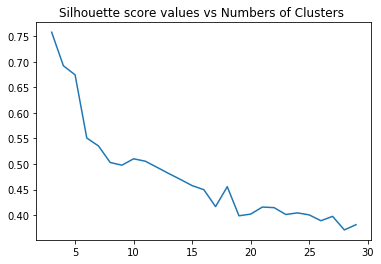

Optimal number of components is:
3


In [77]:
plot_kmeans(X)

## Using 3 clusters for clustering

In [78]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=42)
clf_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [79]:
ProvinceData["Clusters"]=clf_final.predict(X)

In [80]:
cluster_summary=pd.concat([ProvinceData[ProvinceData["Clusters"]==1],ProvinceData[ProvinceData["Clusters"]==2],ProvinceData[ProvinceData["Clusters"]==3],ProvinceData[ProvinceData["Clusters"]==4],ProvinceData[ProvinceData["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Mortality,Clusters
Province/State,,,,
New York,350121,28232,8.0635,1
New Jersey,146504,10363,7.07353,2
Illinois,94191,4177,4.43461,2
Massachusetts,86010,5797,6.73991,2
California,80166,3240,4.04161,2
Pennsylvania,65700,4495,6.8417,2
Michigan,51142,4891,9.56357,2
Texas,48396,1343,2.77502,0
Florida,45588,1973,4.32789,0


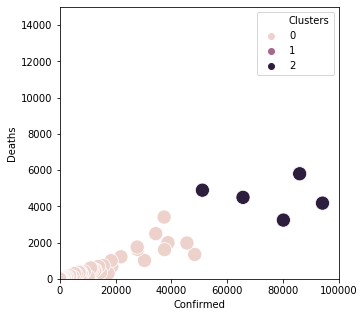

In [81]:
plt.figure(figsize=(5,5))
plt.xlim(xmax=100000)
plt.ylim(ymax=15000)
sns.scatterplot(x=ProvinceData["Confirmed"],y=ProvinceData["Deaths"],hue=ProvinceData["Clusters"],s=200)
plt.show()

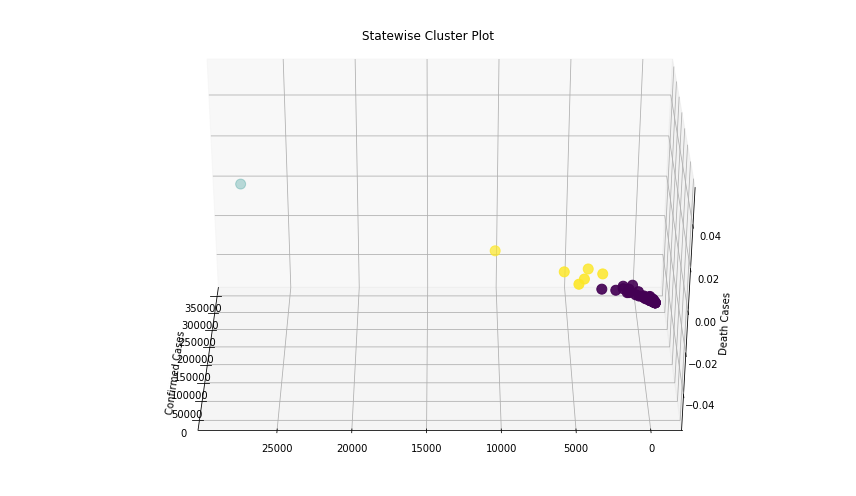

In [82]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ProvinceData["Confirmed"],ProvinceData["Deaths"], c=ProvinceData["Clusters"],
           marker='o',s=100)
ax.view_init(azim=180)
ax.set_xlabel('Confirmed Cases')
ax.set_zlabel('Death Cases')
plt.title("Statewise Cluster Plot")
plt.tight_layout()
plt.show()

### Cluster 0 is a set of states which are very less affected, with comparitively low number of deaths and confirmed cases.

### Cluster 1 belongs to states which are worst affected with high number of deaths and confirmed cases.

### Cluster 2 is set of states which are severly affected, with really high number of deaths and confirmed cases.

### Using ML Algorithms for making predictions

In [83]:
import datetime as dt

In [84]:
datewise=USData.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

In [85]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [86]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [87]:
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  438012.82745862653


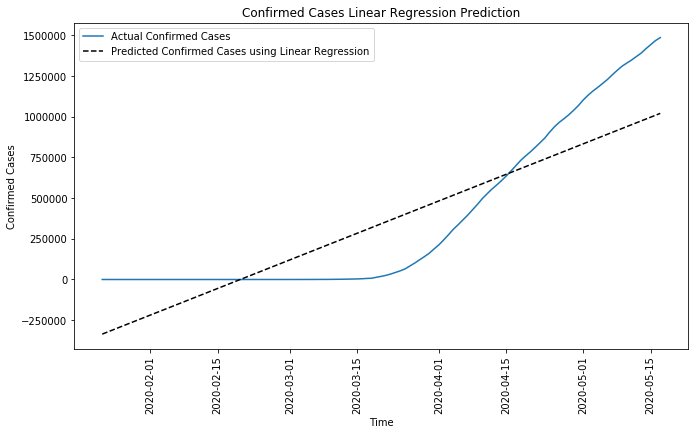

In [88]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Actual Confirmed Cases")
plt.plot(datewise.index,prediction_linreg, linestyle='--',label="Predicted Confirmed Cases using Linear Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Linear Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

In [89]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
poly = PolynomialFeatures(degree = 6) 
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  30614.588566014056


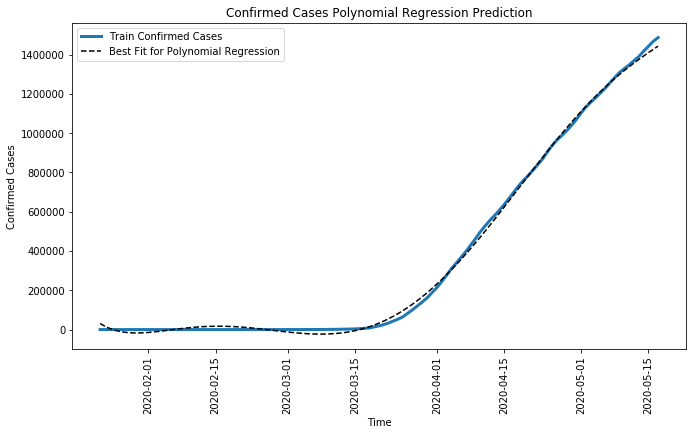

In [90]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(datewise.index,predictions_poly, linestyle='--',label="Best Fit for Polynomial Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Polynomial Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

In [91]:
new_prediction_poly=[]
for i in range(1,21):
    new_date_poly=poly.fit_transform(np.array(datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])
    

In [92]:
model_scores=[]
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [93]:
new_date=[]
new_prediction_lr=[]
for i in range(1,21):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])

In [94]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_poly),
                               columns=["Dates","Linear Regression Prediction","Polynonmial Regression Prediction"])
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction
0,2020-05-18,1032626.3498,1459714.2130
1,2020-05-19,1044320.6850,1476186.4492
2,2020-05-20,1056015.0201,1492888.4180
3,2020-05-21,1067709.3553,1510006.3638
4,2020-05-22,1079403.6905,1527745.6064


## Finding medical facilities using Foursquare API for state with highest number of confirmed cases

In [45]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [46]:
CLIENT_ID = 'WG2VJVFBMYEBHNKDLSM0DTR4AMQ04SM2XFCKGJESQWPRD5MP' # your Foursquare ID
CLIENT_SECRET = 'Z1BUGGFBZ2KHCXJKWSJU0LMALY5NUW4YIGDC0OPDGXSLO21C' # your Foursquare Secret
VERSION = '20200413' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WG2VJVFBMYEBHNKDLSM0DTR4AMQ04SM2XFCKGJESQWPRD5MP
CLIENT_SECRET:Z1BUGGFBZ2KHCXJKWSJU0LMALY5NUW4YIGDC0OPDGXSLO21C


In [288]:
ProvinceData1=USData[USData["ObservationDate"]==USData["ObservationDate"].max()].groupby(["Province/State"]).agg({"Confirmed":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False).reset_index()
ProvinceData1

,Province/State,Confirmed,Deaths
0,New York,350121.0000,28232.0000
1,New Jersey,146504.0000,10363.0000
2,Illinois,94191.0000,4177.0000
3,Massachusetts,86010.0000,5797.0000
4,California,80166.0000,3240.0000
5,Pennsylvania,65700.0000,4495.0000
6,Michigan,51142.0000,4891.0000
7,Texas,48396.0000,1343.0000
8,Florida,45588.0000,1973.0000
9,Maryland,38804.0000,1992.0000


## Finding the latitude and longitude of the Top 5 states using Geocode

In [289]:
def get_location(query):
    """
    This function will return lattitude and longitude of an given address
    """
    geocoder = OpenCageGeocode(key)
    results = geocoder.geocode(query)   
    
    if results:
        lat = results[0]['geometry']['lat']
        long = results[0]['geometry']['lng']
        return [lat, long]
    return [None, None]
import sys
!{sys.executable} -m pip install opencage
from opencage.geocoder import OpenCageGeocode

key = 'edd0d8824a194625ad263a10de172823' # API Key
geocoder = OpenCageGeocode(key)

In [290]:
list_lat = []   # create empty lists
list_long = []

for  row in ProvinceData1['Province/State']:# iterate over rows in dataframe
    Name = row
    query =  str(Name).strip()
    results = geocoder.geocode(query)   
    if results: 
        lat = results[0]['geometry']['lat']
        list_lat.append(lat)
        long = results[0]['geometry']['lng']
        list_long.append(long)
    else:
        lat = 0
        list_lat.append(lat)
        long = 0
        list_long.append(long)

    list_lat
    list_long

### Finding medical facilities in New York using foursquare API

In [291]:
ProvinceData1['Latitude']=list_lat
ProvinceData1['Longitude']= list_long
ProvinceData1=ProvinceData1.sort_values(by=['Confirmed'],ascending=False)
ProvinceData1=ProvinceData1.head(5)
ProvinceData1

,Province/State,Confirmed,Deaths,Latitude,Longitude
0,New York,350121.0000,28232.0000,40.7127,-74.0060
1,New Jersey,146504.0000,10363.0000,40.0757,-74.4042
2,Illinois,94191.0000,4177.0000,40.0797,-89.4337
3,Massachusetts,86010.0000,5797.0000,42.3789,-72.0324
4,California,80166.0000,3240.0000,36.7015,-118.7560


In [385]:
# Now, let us fetch hospital information for each Municipality
def get_hospital_data(lat, lng):
    """
    We are going to utilize foursquare API to fetch hospital data. It will take latitude, longitude and return hospital information.
    """
    radius = 10000
    LIMIT = 100
    FS_CLIENT_ID = 'KI3TR0QO4JOKMFELOMF3WSOOI3HFNBF5YLW354MYWBKDHEX3' # Foursquare ID
    FS_CLIENT_SECRET = 'QF4ZBLJRBV4BQX52DVWUPEHJ14A2UJABPCZARZQZYTKIISUD' # Foursquare Secret
    VERSION = '20181206' # Foursquare API version
    FS_HOSPITAL_KEY = "4bf58dd8d48988d104941735"
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
        FS_CLIENT_ID,
        FS_CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT,
        FS_HOSPITAL_KEY)
    response = requests.get(url)
    if not response.status_code == 200:
        print("ERROR", response.status_code, response.content)
        return None
    results = response.json()
    venue_data = results["response"]["venues"]
    venue_details = []
    for row in venue_data:
        try:
            venue_id = row['id']
            venue_name = row['name']
            lat = row["location"]["lat"]
            lng = row["location"]["lng"]
            venue_category = row['categories']
            venue_details.append(
                [venue_id, venue_name, lat, lng, venue_category])
        except KeyError:
            pass

    column_names = ['ID', 'Name', 'Latitude',
                    'Longitude', "Venue Category"]
    df = pd.DataFrame(venue_details, columns=column_names)
    return df

In [386]:
ProvinceData1 = ProvinceData1.replace(r'\n',  ' ', regex=True)

## Analysing healthcare facilities in New York

In [388]:
df=get_hospital_data(40.7127,-74.0060)

In [393]:
df['Category']=0
df

,ID,Name,Latitude,Longitude,Venue Category,Category
0,4a82ef0af964a52092f91fe3,NewYork-Presbyterian-Lower Manhattan Hospital,40.7099,-74.0048,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",0
1,50c0b119e4b0c4d42f979cd1,Hudson Allergy,40.7141,-74.0095,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",0
2,5eb9a8d1a5a70d00088f5f1d,CityMD West 57th Urgent Care - NYC,40.7674,-73.9837,"[{'id': '56aa371be4b08b9a8d573526', 'name': 'U...",0
3,5644e694498e5f3d3f853e80,Crown Heights Center for Nursing and Rehabilit...,40.6748,-73.9459,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",0
4,5c3fa31d3731ee002c43162d,Klingenstein Clinical Center,40.7897,-73.9526,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",0
5,5e66496ef3bac00008605f07,Harlem Hospital Child Psych @ Ronald Brown Bui...,40.8148,-73.9389,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",0
6,5a1420421ffed768ee24fe07,Cardiac Cath Lab @ Mt Sinai St Lukes,40.8053,-73.9615,"[{'id': '4f4531b14b9074f6e4fb0103', 'name': 'M...",0
7,51f682d1498e76b181e00bcf,Starbase Optometry,40.7547,-73.9712,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",0
8,5bb21660e55d8b003981b3fd,Davita Dialyis,40.7296,-74.0614,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",0
9,4e78a089c65b8073f58dabe9,New York Community Hospital,40.6139,-73.9486,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",0


In [394]:
s=0
for i in df["Venue Category"]:
    x=df["Venue Category"].loc[s][0]['name']
    df.iloc[s,5]=x
    s=s+1 
df1=df.groupby(['Category']).count()
df1=df1.sort_values(by='ID',ascending=False)

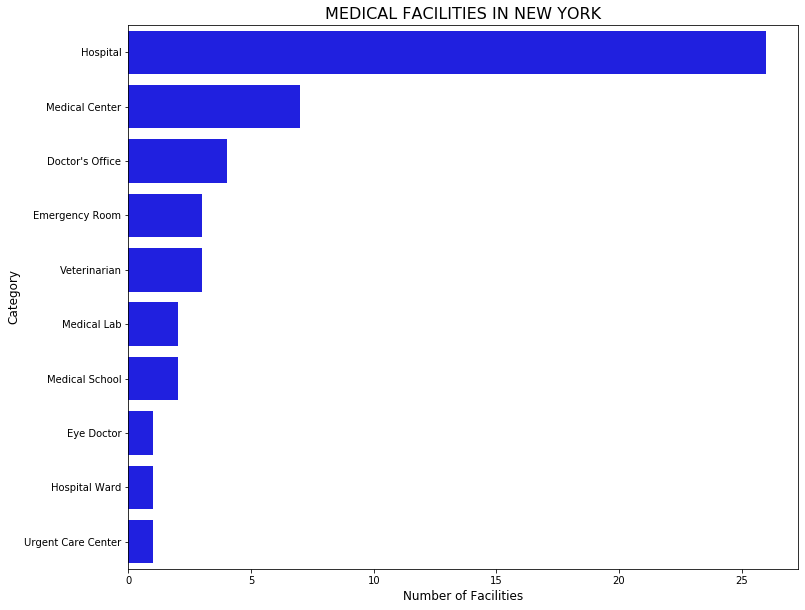

In [423]:
plt.figure(figsize=(12,10))
sns.barplot(x=df1["ID"],y=df1.index,color='blue')
plt.title("MEDICAL FACILITIES IN NEW YORK",fontsize=16)
plt.xlabel("Number of Facilities",fontsize=12)
plt.ylabel("Category",fontsize=12)
plt.show()